In [2]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import pickle
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
import sys
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from numpy import genfromtxt
from dataframe import DataFrame

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 1.1.3
numpy : 1.19.2
matplotlib : 3.3.2
seaborn : 0.11.0
sklearn : 0.23.0
imblearn : 0.8.0


In [3]:
df_train = pd.read_csv('KDDTrain.csv')
df_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19


In [4]:
df_test = pd.read_csv('KDDTest.csv')
df_test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21


In [5]:
mapping = {'http': 'browsing','http_8001': 'browsing','http_2784': 'browsing','http_443': 'browsing',          
           'ftp': 'file_transfer','ftp_data': 'file_transfer','efs': 'file_transfer','ldap': 'file_transfer',
           'tftp_u': 'file_transfer',          
           'pop_2': 'mail','pop_3': 'mail','smtp': 'mail','imap4': 'mail','aol': 'mail','nntp': 'mail','nnsp': 'mail',
           'iso_tsap': 'mail','csnet_ns': 'mail',          
           'remote_job': 'remote_jobs','rje': 'remote_jobs','sunrpc': 'remote_jobs','courier': 'remote_jobs',
           'exec': 'remote_jobs','printer': 'remote_jobs',      
           'daytime': 'time','time': 'time','ntp_u': 'time',         
           'name': 'DNS','hostnames': 'DNS','domain': 'DNS','whois': 'DNS',
           'netbios_ns': 'netbios','netbios_dgm': 'netbios','netbios_ssn': 'netbios',
           'eco_i': 'error_reports','urp_i': 'error_reports','ecr_i': 'error_reports','tim_i': 'error_reports',
           'red_i': 'error_reports','urh_i': 'error_reports',
           'finger': 'auth','auth': 'auth','supdup': 'auth','login': 'auth',
           'Z39_50': 'search','gopher': 'search',
           'kshell': 'kerberos','klogin': 'kerberos',
           'systat': 'unix','netstat': 'unix','X11': 'unix','discard': 'unix','echo': 'unix','uucp_path': 'unix',
           'uucp': 'unix',
           'telnet': 'telnet','ssh': 'telnet','shell': 'telnet',
           'ctf': 'text_services','IRC': 'text_services',
           'other': 'others','harvest': 'others','bgp': 'others','link': 'others','pm_dump': 'others',
           'private': 'private',
           'vmnet': 'virtual_network',
           'sql_net': 'oracle',
           'mtp': 'media','domain_u': 'media'
        }

In [6]:
# Apply service class mappings to the dataset
df_train['class'] = df_train['service'].apply(lambda v: mapping[v])
df_test['class'] = df_test['service'].apply(lambda v: mapping[v])

In [7]:
# Drop service field from both train and test data
df_train.drop(['service'], axis=1, inplace=True)
df_test.drop(['service'], axis=1, inplace=True)

In [8]:
# View top 3 train data 
df_train.head(3)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,class
0,0,tcp,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20,file_transfer
1,0,udp,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15,others
2,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19,private


In [9]:
df_train['num_outbound_cmds'].value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [10]:
df_test['num_outbound_cmds'].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [11]:
df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [12]:
# Service Distribution
service_freq_train = df_train[['class']].apply(lambda x: x.value_counts())
service_freq_test = df_test[['class']].apply(lambda x: x.value_counts())
service_freq_train['frequency_percent_train'] = round((100 * service_freq_train / service_freq_train.sum()),2)
service_freq_test['frequency_percent_test'] = round((100 * service_freq_test / service_freq_test.sum()),2)

service_dist = pd.concat([service_freq_train,service_freq_test], axis=1) 
service_dist


,class,frequency_percent_train,class,frequency_percent_test
browsing,40871,32.44,7889,34.99
private,21853,17.35,4774,21.18
mail,10462,8.30,2417,10.72
file_transfer,9512,7.55,1596,7.08
media,9482,7.53,926,4.11
error_reports,8291,6.58,1043,4.63
others,5551,4.41,941,4.17
auth,3695,2.93,259,1.15
unix,3351,2.66,232,1.03
telnet,2729,2.17,1668,7.40


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
enctest = testcat.drop(['class'], axis=1)

cat_Ytrain = traincat[['class']].copy()
cat_Ytest = testcat[['class']].copy()

In [15]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = df_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 40871, 11: 21853, 6: 10462, 4: 9512, 7: 9482, 3: 8291, 10: 5551, 1: 3695, 17: 3351, 14: 2729, 0: 2173, 12: 1822, 13: 1380, 16: 1343, 8: 1114, 15: 750, 5: 732, 18: 617, 9: 245})
Resampled dataset shape Counter({4: 40871, 10: 40871, 11: 40871, 2: 40871, 12: 40871, 0: 40871, 8: 40871, 3: 40871, 7: 40871, 14: 40871, 1: 40871, 17: 40871, 13: 40871, 6: 40871, 18: 40871, 5: 40871, 9: 40871, 16: 40871, 15: 40871})


### feature selection algorithm

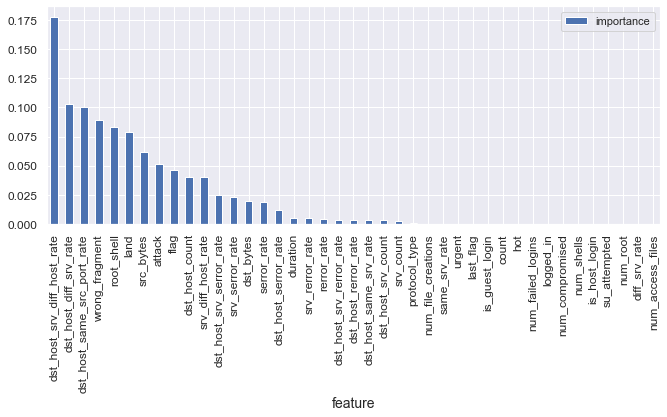

In [17]:
X_res= df_train.drop("class", axis= 1)
y_res= df_train["class"]

rfc = RandomForestClassifier(max_depth=2, random_state=0);

# fit random forest classifier on the training set
rfc.fit(X_res, y_res);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [18]:
X=df_train[['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 
            'root_shell', 'land', 'flag', 'attack', 'dst_host_count', 'src_bytes']]

y=df_train['class']

print("Splitting into tain and test")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True)

Splitting into tain and test


In [20]:
def pretty_confusion(y_true, y_pred, model_name):
    # Calculate the confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)
    
    # Add labels to the plot
    class_names = ['DNS', 'auth', 'browsing', 'error_reports', 'file_transfer', 'kerberos', 'mail', 'media', 'netbios',
                   'oracle', 'others', 'private', 'remote_jobs', 'search', 'telnet', 'text_services', 'time', 'unix',
                   'virtual_network']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for {}'.format(model_name)) 
    plt.tight_layout()

### Random Forest Classifier

Training Started
Testing the classifier
accuracy 0.7810763613271948


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.82      0.07      0.13       197
           auth       0.64      0.27      0.38       368
       browsing       0.99      0.95      0.97      4034
  error_reports       0.99      1.00      0.99       815
  file_transfer       0.92      0.71      0.80       943
       kerberos       0.00      0.00      0.00        67
           mail       0.93      0.70      0.80      1074
          media       0.99      0.95      0.97       991
        netbios       1.00      0.01      0.02       123
         oracle       0.00      0.00      0.00        27
         others       0.84      0.75      0.80       563
        private       0.48      0.95      0.63      2179
    remote_jobs       0.00      0.00      0.00       165
         search       0.50      0.01      0.01       146
         telnet       

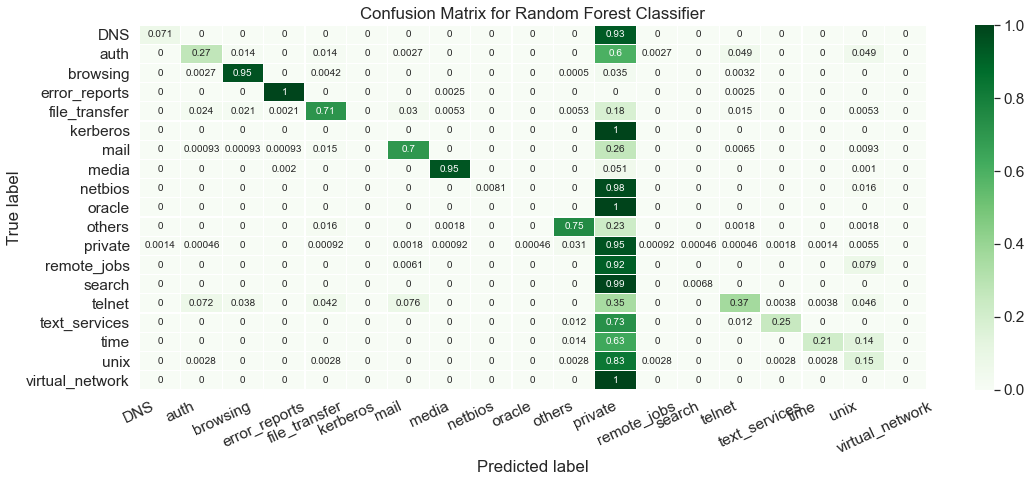

In [79]:
clf = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=1)
print("Training Started")
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "Random Forest Classifier")

In [80]:
test_X=df_test[['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 
            'root_shell', 'land', 'flag', 'attack', 'dst_host_count', 'src_bytes']]
test_y=df_test['class']

Testing the classifier model
accuracy 0.6833303761533002


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.20      0.36      0.25       259
       browsing       0.96      0.93      0.94      7889
  error_reports       0.63      0.91      0.74      1043
  file_transfer       0.32      0.38      0.35      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.63      0.47      0.54      2417
          media       0.49      0.95      0.65       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.45      0.23      0.30       941
        private       0.69      0.74      0.71      4774
    remote_jobs       0.00      0.00      0.00       259
         search       0.00      0.00      0.00        79
         telnet       0.45      0

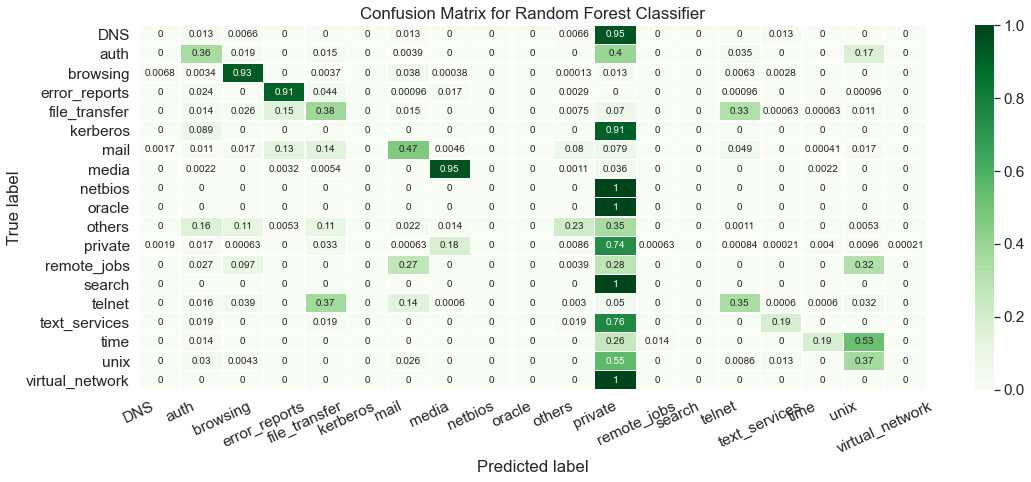

In [81]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "Random Forest Classifier")

### AdaBoost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Training Started
Testing the classifier
accuracy 0.7771074773773615


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.76      0.07      0.12       197
           auth       0.66      0.27      0.38       368
       browsing       0.99      0.95      0.97      4034
  error_reports       0.99      0.99      0.99       815
  file_transfer       0.90      0.71      0.79       943
       kerberos       0.00      0.00      0.00        67
           mail       0.92      0.70      0.79      1074
          media       0.99      0.94      0.97       991
        netbios       0.00      0.00      0.00       123
         oracle       0.00      0.00      0.00        27
         others       0.85      0.69      0.77       563
        private       0.47      0.96      0.63      2179
    remote_jobs       0.00      0.00      0.00       165
         search       0.50      0.01      0.01       146
         telnet       

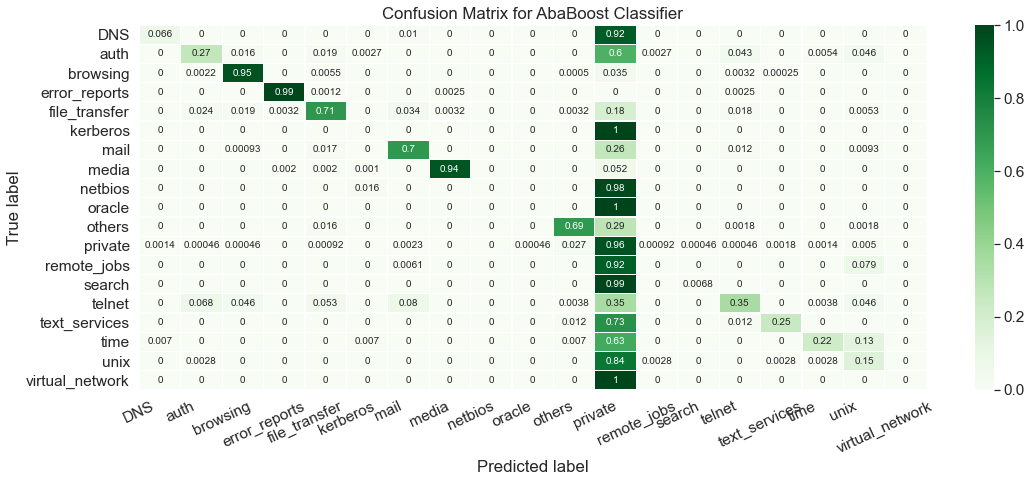

In [82]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=40),n_estimators=100)
print("Training Started")
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "AbaBoost Classifier")

Testing the classifier model
accuracy 0.6870564229950319


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.21      0.34      0.26       259
       browsing       0.96      0.95      0.96      7889
  error_reports       0.62      0.93      0.74      1043
  file_transfer       0.30      0.26      0.28      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.77      0.41      0.54      2417
          media       0.52      0.95      0.67       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.37      0.23      0.28       941
        private       0.69      0.77      0.73      4774
    remote_jobs       0.00      0.00      0.00       259
         search       0.00      0.00      0.00        79
         telnet       0.36      0

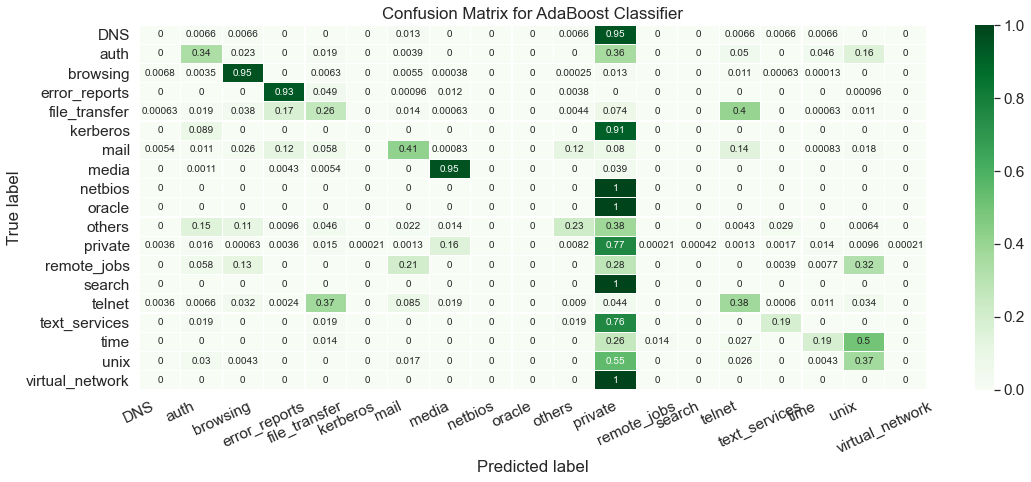

In [83]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "AdaBoost Classifier")

### C4.5 Classifier

Training Started
Testing the classifier
accuracy 0.7783775202413081


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.93      0.07      0.12       197
           auth       0.63      0.27      0.37       368
       browsing       0.99      0.95      0.97      4034
  error_reports       0.99      1.00      0.99       815
  file_transfer       0.89      0.70      0.78       943
       kerberos       0.00      0.00      0.00        67
           mail       0.93      0.69      0.79      1074
          media       0.99      0.94      0.96       991
        netbios       0.00      0.00      0.00       123
         oracle       0.00      0.00      0.00        27
         others       0.83      0.75      0.79       563
        private       0.48      0.96      0.64      2179
    remote_jobs       0.00      0.00      0.00       165
         search       1.00      0.01      0.01       146
         telnet       

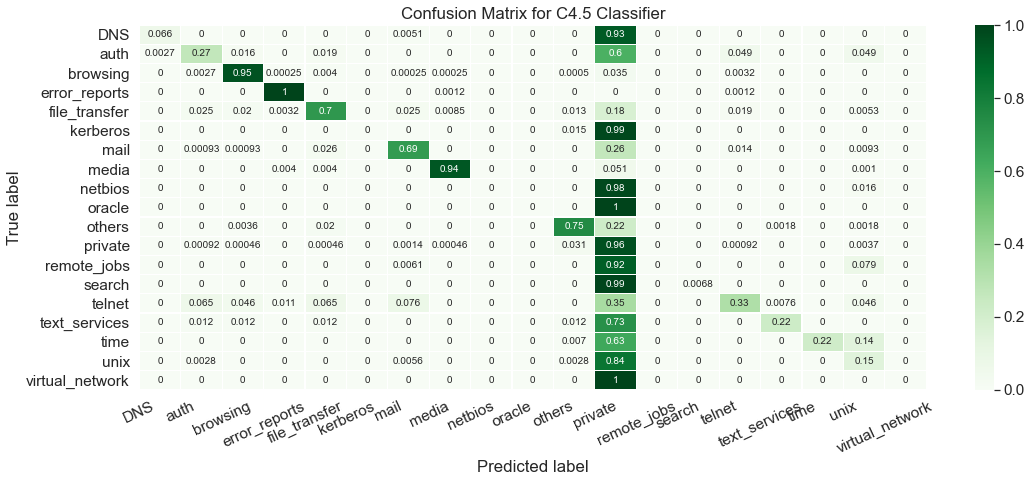

In [84]:
clf = DecisionTreeClassifier(criterion="gini", random_state=200, max_depth=82, min_samples_leaf=5)
print("Training Started")
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "C4.5 Classifier")

Testing the classifier model
accuracy 0.6477555003548616


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.14      0.33      0.19       259
       browsing       0.84      0.88      0.86      7889
  error_reports       0.80      0.92      0.86      1043
  file_transfer       0.25      0.21      0.23      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.54      0.34      0.41      2417
          media       0.49      0.94      0.64       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.78      0.24      0.37       941
        private       0.69      0.74      0.72      4774
    remote_jobs       0.33      0.00      0.01       259
         search       0.00      0.00      0.00        79
         telnet       0.42      0

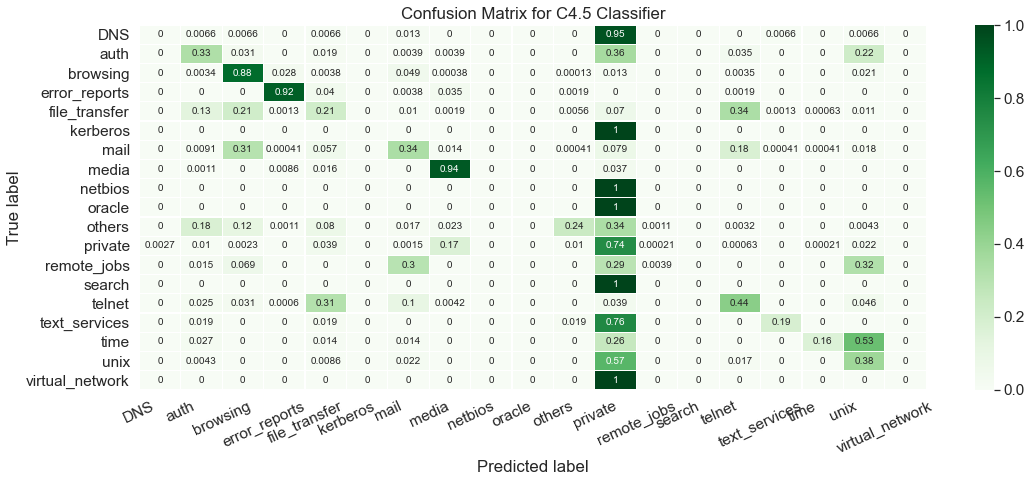

In [85]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "C4.5 Classifier")

### MLP Classifier

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

Training Started
Testing the classifier
accuracy 0.4418955389744404


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       197
           auth       0.00      0.00      0.00       368
       browsing       0.68      0.72      0.70      4034
  error_reports       0.91      0.77      0.83       815
  file_transfer       0.06      0.28      0.10       943
       kerberos       0.00      0.00      0.00        67
           mail       0.00      0.00      0.00      1074
          media       0.80      0.90      0.85       991
        netbios       0.00      0.00      0.00       123
         oracle       0.00      0.00      0.00        27
         others       0.75      0.36      0.49       563
        private       0.50      0.31      0.38      2179
    remote_jobs       0.00      0.00      0.00       165
         search       0.00      0.00      0.00       146
         telnet       

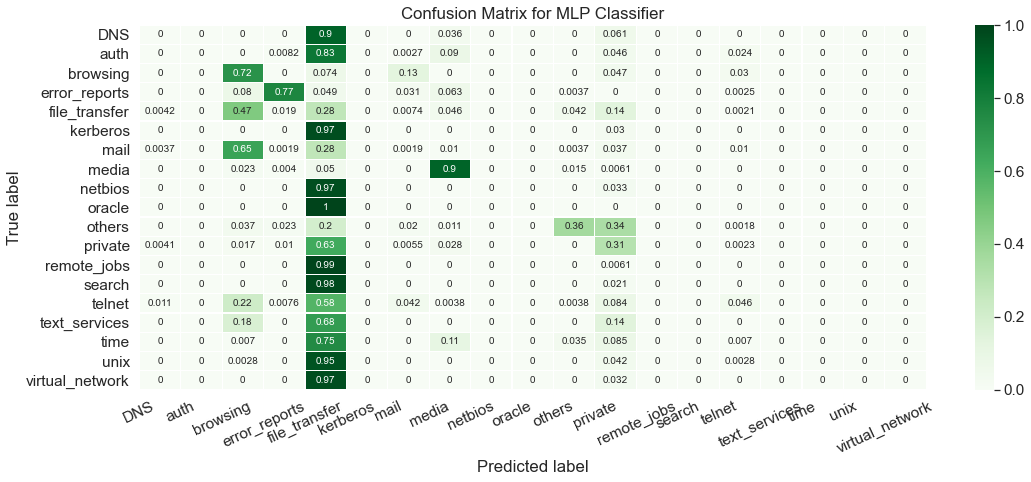

In [87]:
clf = MLPClassifier(max_iter=150,random_state=40)
print("Training Started")
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "MLP Classifier")

Testing the classifier model
accuracy 0.35632540809084456


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.00      0.00      0.00       259
       browsing       0.81      0.72      0.76      7889
  error_reports       0.41      0.74      0.52      1043
  file_transfer       0.02      0.10      0.03      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.00      0.00      0.00      2417
          media       0.40      0.92      0.56       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.15      0.01      0.03       941
        private       0.24      0.12      0.16      4774
    remote_jobs       0.00      0.00      0.00       259
         search       0.00      0.00      0.00        79
         telnet       0.05      

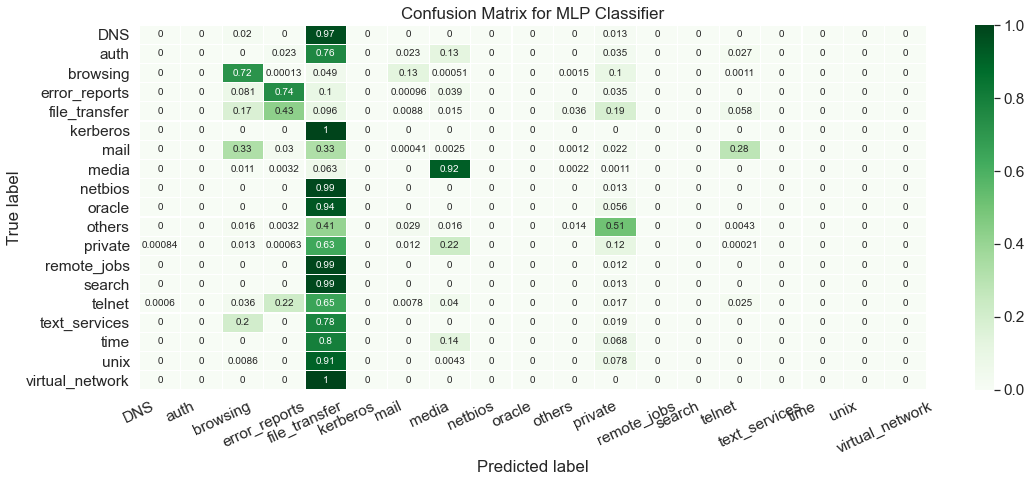

In [88]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "MLP Classifier")

### SVM Classifier with rbf kernel

In [89]:
from sklearn.svm import SVC

Training Started
Testing the classifier
accuracy 0.32314653119542786


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       197
           auth       0.00      0.00      0.00       368
       browsing       0.32      1.00      0.49      4034
  error_reports       0.00      0.00      0.00       815
  file_transfer       0.97      0.04      0.07       943
       kerberos       0.00      0.00      0.00        67
           mail       0.00      0.00      0.00      1074
          media       0.00      0.00      0.00       991
        netbios       0.00      0.00      0.00       123
         oracle       0.00      0.00      0.00        27
         others       0.00      0.00      0.00       563
        private       0.00      0.00      0.00      2179
    remote_jobs       0.00      0.00      0.00       165
         search       0.00      0.00      0.00       146
         telnet      

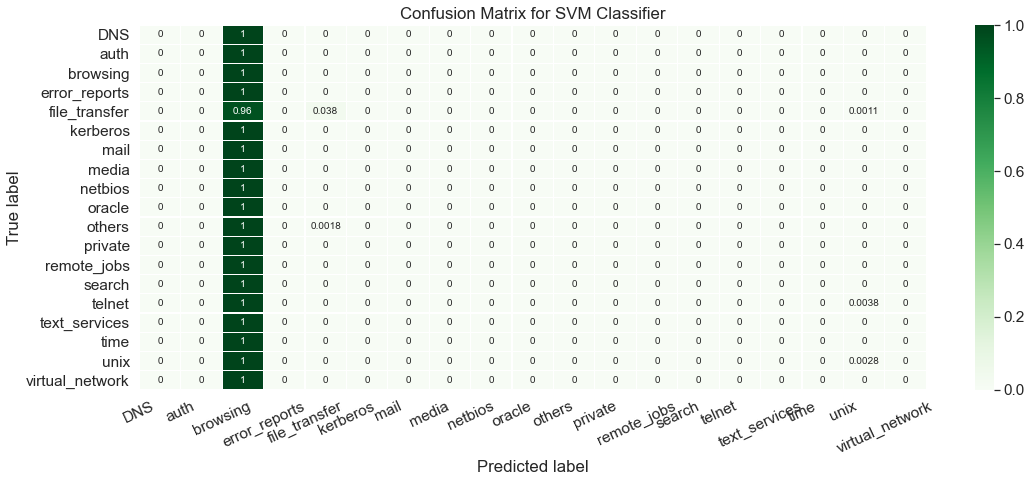

In [90]:
clf = SVC(kernel='rbf',random_state=7)
print("Training Started")
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "RBF Classifier")

Testing the classifier model
accuracy 0.3502040454222853


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.00      0.00      0.00       259
       browsing       0.35      1.00      0.52      7889
  error_reports       0.00      0.00      0.00      1043
  file_transfer       0.80      0.00      0.00      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.00      0.00      0.00      2417
          media       0.00      0.00      0.00       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.00      0.00      0.00       941
        private       0.00      0.00      0.00      4774
    remote_jobs       0.00      0.00      0.00       259
         search       0.00      0.00      0.00        79
         telnet       0.00      0

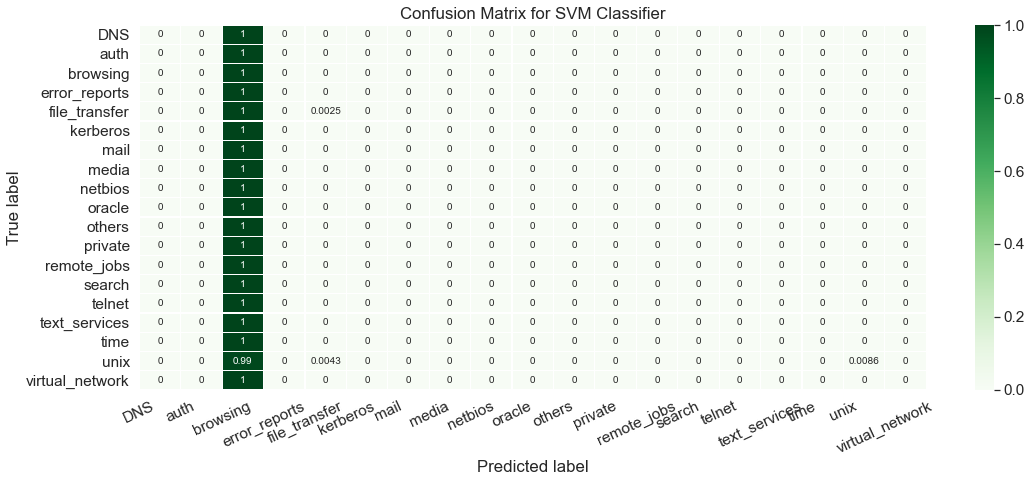

In [92]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "RBF Classifier")